# **Supermarket Sales Analysis: Understanding Buying Patterns **


Description - Handling missing values (product category, discount applied), Data grouping (sales by product type), Basket analysis (frequent item combinations), Trend visualization (peak sales hours), Comparative analysis (weekend vs. weekday sales)

In [11]:
# Dataset uploading
from google.colab import files
data = files.upload()

Saving sales_data.csv to sales_data.csv


Importing packages and reading the dataset


In [12]:
import pandas as pd
df = pd.read_csv('sales_data.csv')
print(df)

    Transaction_ID Product_Category  Sales_Amount  Discount_Applied  \
0          TXN1000           Bakery        338.10               5.0   
1          TXN1001              NaN        560.23               0.0   
2          TXN1002       Vegetables        360.32               0.0   
3          TXN1003           Bakery        836.48              15.0   
4          TXN1004            Dairy        307.97              10.0   
..             ...              ...           ...               ...   
495        TXN1495             Meat        452.42              10.0   
496        TXN1496        Beverages        323.53               5.0   
497        TXN1497           Fruits        634.20               0.0   
498        TXN1498           Snacks        916.26               5.0   
499        TXN1499             Meat        182.16              15.0   

    Transaction_Time Day_of_Week  
0              21:30    Saturday  
1              15:00    Thursday  
2              10:00      Monday  
3      

Display the particular rows and columns in a dataset.

In [13]:
df.head(20)

,Transaction_ID,Product_Category,Sales_Amount,Discount_Applied,Transaction_Time,Day_of_Week
0,TXN1000,Bakery,338.10,5.0,21:30,Saturday
1,TXN1001,NaN,560.23,0.0,15:00,Thursday
2,TXN1002,Vegetables,360.32,0.0,10:00,Monday
3,TXN1003,Bakery,836.48,15.0,22:00,Monday
4,TXN1004,Dairy,307.97,10.0,18:30,Wednesday
5,TXN1005,Vegetables,966.99,15.0,09:30,Sunday
6,TXN1006,Vegetables,484.40,15.0,17:30,Saturday
7,TXN1007,Bakery,849.92,15.0,09:30,Friday
8,TXN1008,NaN,234.66,15.0,16:30,Friday
9,TXN1009,Dairy,440.79,20.0,09:30,Monday


Checking Basic Info & Summary

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    500 non-null    object 
 1   Product_Category  470 non-null    object 
 2   Sales_Amount      500 non-null    float64
 3   Discount_Applied  480 non-null    float64
 4   Transaction_Time  500 non-null    object 
 5   Day_of_Week       500 non-null    object 
dtypes: float64(2), object(4)
memory usage: 23.6+ KB


In [15]:
df.describe()

,Sales_Amount,Discount_Applied
count,500.000000,480.000000
mean,532.064800,9.625000
std,266.923191,7.149244
min,52.470000,0.000000
25%,304.590000,5.000000
50%,552.650000,10.000000
75%,750.320000,15.000000
max,997.810000,20.000000


In [16]:
df.isnull().sum()

,0
Transaction_ID,0
Product_Category,30
Sales_Amount,0
Discount_Applied,20
Transaction_Time,0
Day_of_Week,0


Handle Missing Values

 Fill Missing Product Categories with "Unknown"


In [21]:
# Fill missing Product Categories with "Unknown"
df["Product_Category"] = df["Product_Category"].fillna("Unknown")

# Fill missing Discounts with the median value
df["Discount_Applied"] = df["Discount_Applied"].fillna(df["Discount_Applied"].median())
print(df.isnull().sum())


Transaction_ID      0
Product_Category    0
Sales_Amount        0
Discount_Applied    0
Transaction_Time    0
Day_of_Week         0
dtype: int64


 Perform Data Grouping

In [22]:
df.groupby("Product_Category")["Sales_Amount"].sum().sort_values(ascending=False)


,Sales_Amount
Product_Category,
Beverages,40523.01
Fruits,40155.59
Dairy,35750.92
Bakery,35308.90
Snacks,34383.23
Meat,33877.87
Vegetables,30064.53
Unknown,15968.35


In [23]:
df.groupby("Product_Category")["Discount_Applied"].mean()


,Discount_Applied
Product_Category,
Bakery,10.367647
Beverages,9.794521
Dairy,10.220588
Fruits,9.605263
Meat,8.059701
Snacks,10.161290
Unknown,7.333333
Vegetables,10.446429


In [24]:
df.groupby("Day_of_Week")["Sales_Amount"].sum()


,Sales_Amount
Day_of_Week,
Friday,41789.05
Monday,35360.42
Saturday,37683.00
Sunday,37122.30
Thursday,45549.02
Tuesday,39573.09
Wednesday,28955.52


 Basket Analysis using the Apriori Algorithm from the mlxtend library to find frequent item combinations.

In [25]:
#library for finding frequent items
!pip install mlxtend


In [26]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Convert transactions into a list format (group by Transaction_ID)
basket_data = df.groupby("Transaction_ID")["Product_Category"].apply(list).tolist()

# Convert into a one-hot encoded DataFrame
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(basket_data).transform(basket_data)
basket_df = pd.DataFrame(te_ary, columns=te.columns_)

# Display the transformed data
basket_df.head()


,Bakery,Beverages,Dairy,Fruits,Meat,Snacks,Unknown,Vegetables
0,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True
3,True,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Bakery').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Dairy').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Unknown').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Vegetables').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Dairy'].value_counts()
    for x_label, grp in _df_4.groupby('Bakery')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Bakery')
_ = plt.ylabel('Dairy')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Unknown'].value_counts()
    for x_label, grp in _df_5.groupby('Dairy')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Dairy')
_ = plt.ylabel('Unknown')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Vegetables'].value_counts()
    for x_label, grp in _df_6.groupby('Unknown')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Unknown')
_ = plt.ylabel('Vegetables')

Apply Apriori Algorithm

In [27]:
# Generate frequent itemsets with a minimum support of 0.02 (2% of transactions)
frequent_itemsets = apriori(basket_df, min_support=0.02, use_colnames=True)

# Display frequent itemsets
print(frequent_itemsets.sort_values(by="support", ascending=False).head(10))


   support      itemsets
3    0.152      (Fruits)
1    0.146   (Beverages)
0    0.136      (Bakery)
2    0.136       (Dairy)
4    0.134        (Meat)
5    0.124      (Snacks)
7    0.112  (Vegetables)
6    0.060     (Unknown)


 Extract Association Rules

In [28]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the top rules
print(rules.sort_values(by="lift", ascending=False).head(10))


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


Install NetworkX and Matplotlib

In [29]:
!pip install networkx matplotlib


<ipython-input-34-94fe29f46d4b>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Transaction_Time"] = pd.to_datetime(df["Transaction_Time"])


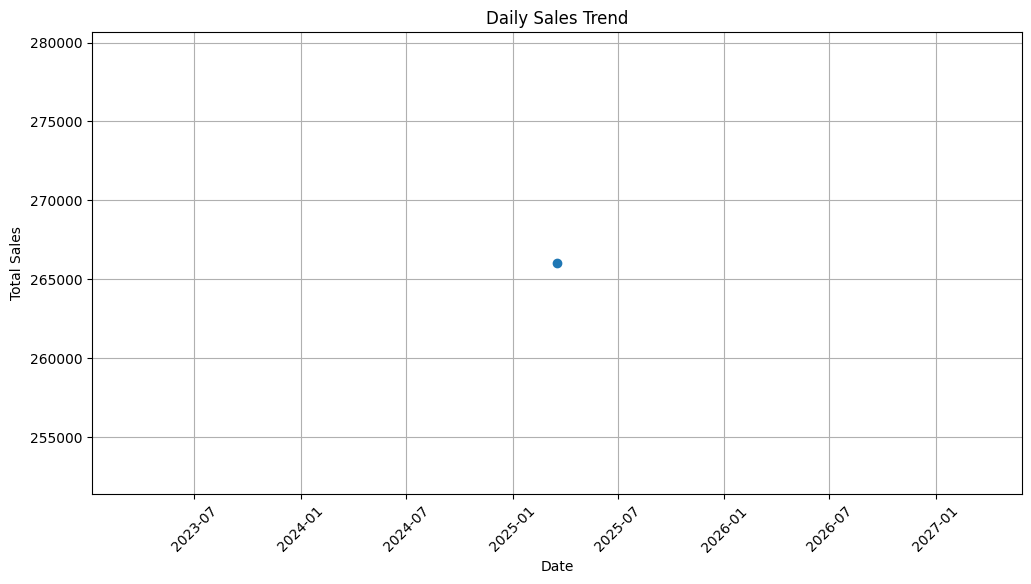

In [34]:
import matplotlib.pyplot as plt

# Convert Transaction_Time to datetime (if not already)
df["Transaction_Time"] = pd.to_datetime(df["Transaction_Time"])

# Aggregate sales per day
daily_sales = df.groupby(df["Transaction_Time"].dt.date)["Sales_Amount"].sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Daily Sales Trend")
plt.xticks(rotation=45)
plt.grid()
plt.show()


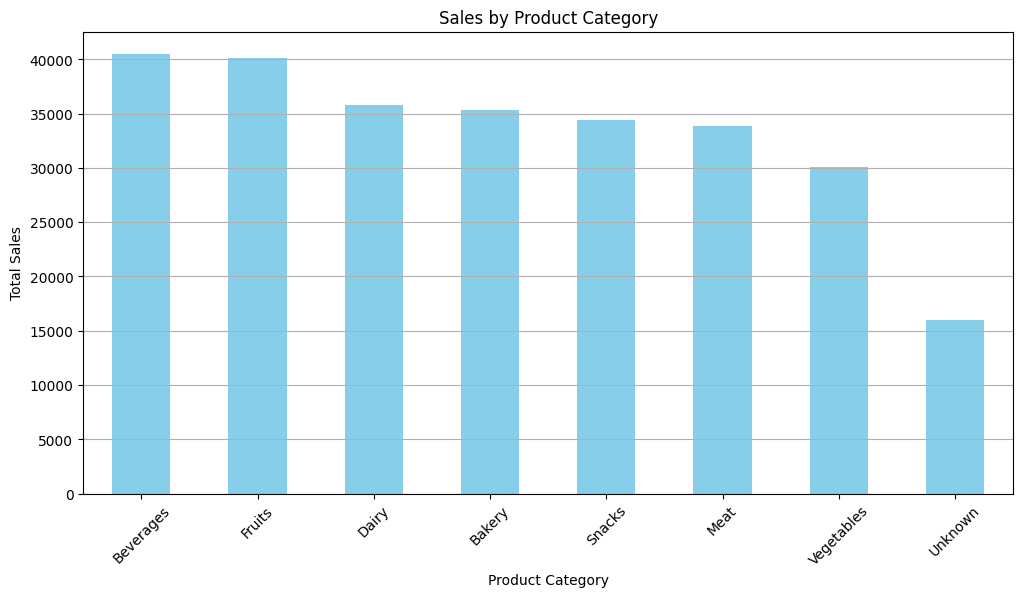

In [35]:
# Aggregate sales by category
# Sales Distribution by Product Category (Bar Chart)
category_sales = df.groupby("Product_Category")["Sales_Amount"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
category_sales.plot(kind="bar", color="skyblue")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.title("Sales by Product Category")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


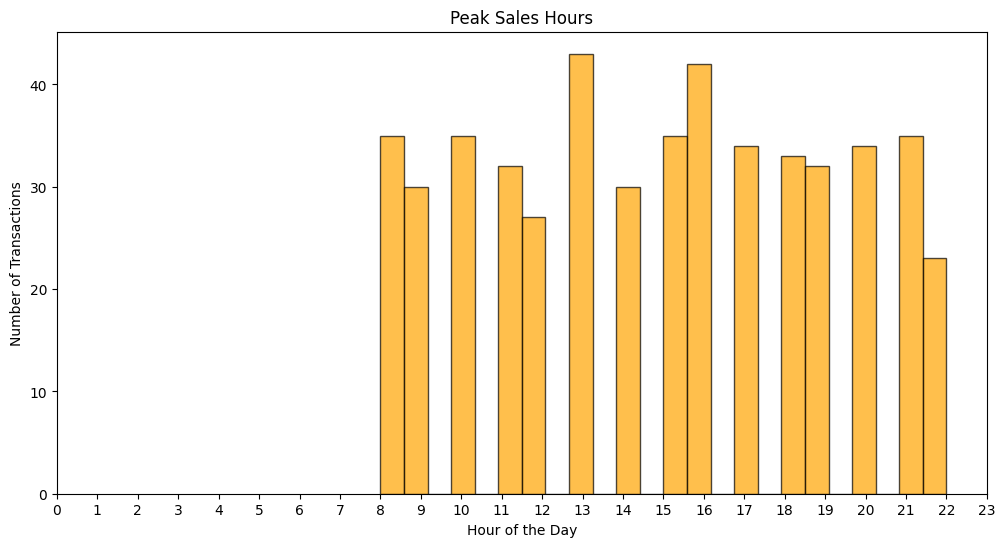

In [36]:
#Peak Sales Hours (Histogram)
# Extract hour from transaction time
df["Hour"] = df["Transaction_Time"].dt.hour

# Plot histogram of sales by hour
plt.figure(figsize=(12, 6))
df["Hour"].hist(bins=24, color="orange", edgecolor="black", alpha=0.7)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.title("Peak Sales Hours")
plt.xticks(range(0, 24))
plt.grid()
plt.show()


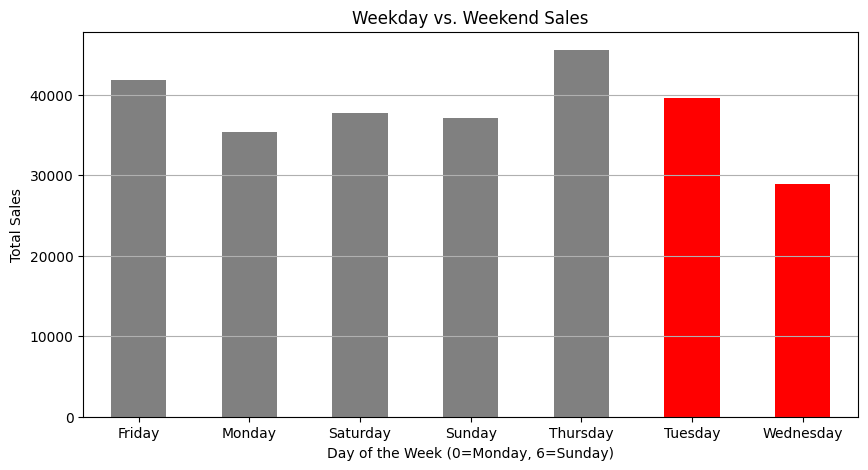

In [37]:
#Weekend vs. Weekday Sales (Bar Chart)
# Aggregate sales by day of the week
weekday_sales = df.groupby("Day_of_Week")["Sales_Amount"].sum()

# Plot
plt.figure(figsize=(10, 5))
weekday_sales.plot(kind="bar", color=["gray" if day < 5 else "red" for day in range(7)])
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Total Sales")
plt.title("Weekday vs. Weekend Sales")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
